In [2]:
#PHYS 213
#Assignment 6
#Anne Xie
#Student Number: 20125978

In [3]:
#load in libraries
import numpy as np
import matplotlib.pyplot as plt

#read in data
xData, yData = np.loadtxt("assignment6_picoData.txt", unpack = True, skiprows = 1, delimiter = ",")
plt.plot(xData,yData) #plot data

#label axis
plt.xlabel("sample")
plt.ylabel("data")
plt.rcParams['figure.figsize'] = 10,8

Using the standard deviation of 50, the mean is 0.5509130337269214 with a standard deviation of 2.357519963417601
Using the standard deviation of 1.1, the mean is 0.5533540317715016 with a standard deviation of 5.278079675845744


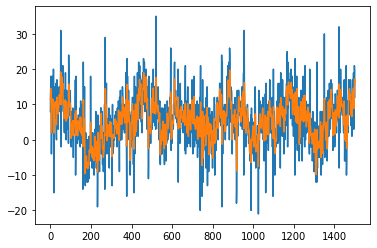

In [4]:
xRange = xData[:1501] #set desired x-axis
yRange = yData[:1501] #set y-axis
plt.plot(xRange,yRange) #plot

def gauss(x,y,dev): #define a function to do the gaussian smoothing
    smooth = np.zeros(yRange.size) #make list
    for i in range(len(xRange)):  #loop through each point
        point = np.exp(-(xRange - i)**2/(2*dev**2)) #take gaussian weight for each point
        point = point/sum(point) #scale gaussian
        smooth[i] = sum(yRange*point) 
    return smooth

smooth = gauss(xRange,yRange, 50) #gaussian smoothing for standard deviation of 50
smooth2 = gauss(xRange,yRange, 1.1) #gaussian smoothing for standard deviation of 1.1
plt.plot(xRange,smooth2) #plot

#Ensure correct ranges of data
xRange1 = xData[:15001]
yRange1 = yData[:15001]
smoothVal = gauss(xRange1,yRange1, 50)
smoothVal2 = gauss(xRange1,yRange1, 1.1)

#Finding mean
mean1 = sum(smoothVal)/len(xRange1)
mean2 = sum(smoothVal2)/len(xRange1)

print ("Using the standard deviation of 50, the mean is",mean1,"with a standard deviation of",np.std(smoothVal))
print ("Using the standard deviation of 1.1, the mean is",mean2,"with a standard deviation of",np.std(smoothVal2))

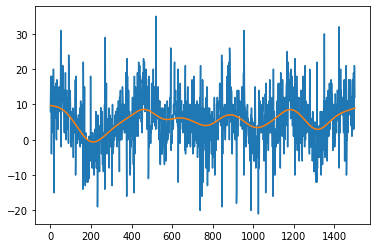

In [5]:
#Plotting second graph
plt.plot(xRange,yRange)
plt.plot(xRange,smooth)

The points with an absolute value between 60 and 61 are:
( 17493 , 60.46000000000001 )
( 17516 , 60.96 )
( 17517 , 60.02 )
( 18261 , 60.06 )
( 18387 , -60.26 )
( 18588 , 60.31999999999999 )


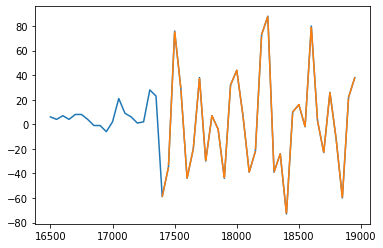

In [34]:
#Question 2
#Linear interpolation

#read in data
xData2, yData2 = np.loadtxt("assignment6_trigData.txt", unpack = True, skiprows = 1, delimiter = ",")
plt.plot(xData2, yData2) #plot data

#make lists for the points and slopes
point = []
slope = []

for i in range(len(xData2)-1): #for each point except the last
    point.append(yData2[i]) #find data point and add to list
    slope.append((yData2[i+1] - yData2[i])/(xData2[i+1]-xData2[i])) #find the slope and add to list

def interpolation(x,y,xPoint): #define function to do interpolation
    for i in range(len(xData2)-1): 
        if xPoint > xData2[i] and xPoint < xData2[i+1]: #for the points in the right range
            iVal = point[i] + (xPoint-xData2[i])*slope[i] #interpolate
            if abs(iVal) >= 60 and abs(iVal) <=61: #select points with the absolute value between 60 and 61
                print ("(",xPoint,",",iVal,")") #print these points
            return iVal #return the point
        
xCheck = np.arange(17400,19001,1) #set x range

print ("The points with an absolute value between 60 and 61 are:")

yCheck = [interpolation(xData2,yData2,element) for element in xCheck] #find interpolated points
plt.plot(xCheck,yCheck) #plot it up!

The points with an absolute value between 60 and 61 are:
( 17282 , 60.668173055236686 )
( 17485 , 60.66636309146849 )
( 17528 , 60.5320172043043 )
( 18197 , 60.492613464482204 )


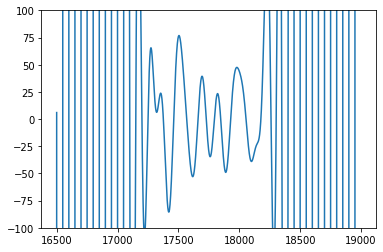

In [51]:
#Question 3
#Lagrange interpolation

def lagrange(x,y,xSpot): #define function to do lagrange interpolation
    n = len(x)
    nx = len(xSpot)
    L = np.zeros(len(xSpot)) #set up list for lagrange values
    
    def parameter(j,xi): #define function for the parameters
        v = 1.0
        for i in range(n):
            if i != j:
                v *=(xi-x[i])/(x[j]-x[i])
        return v
    
    for i,xi in enumerate(xSpot): #make the Lagrange value list
        for j in range(n):
            L[i] += y[j]*parameter(j,xi)
    return L  #return Lagrange values

xCheckL = np.arange(16500,19001,1) #set x range
yCheckL = lagrange(xData2,yData2,xCheckL) #find interpolated points
plt.plot(xCheckL,yCheckL) #try to plot, have it run into an error, try to fix error for 4 
#hours, contemplate your entire life, cry a bit, try again for another hour, give up and hand
#it in anyway because in the grand scheme of things it's not worth the tears
#I'm really sorry I tried, but I really just don't understand it
plt.ylim(top = 100) #Set y ranges
plt.ylim(bottom = -100)
#UPDATE: Have TA find the error, fix error, zoom into graph, be happy

print ("The points with an absolute value between 60 and 61 are:")  

for i in range(len(xCheckL)): #loop through all values
    if yCheckL[i] >= 60 and yCheckL[i] <= 61: #find the points between 60 and 61
        print ("(",xCheckL[i],",",yCheckL[i],")") #print these points

The points with an absolute value between 60 and 61 are:
( 18389 , 60.07577194008944 )
( 18432 , 60.42493324533189 )


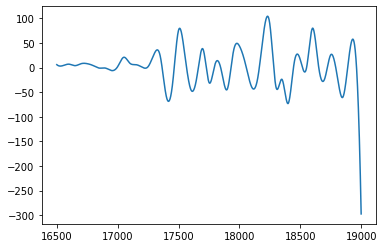

In [48]:
#Question 4

import scipy.interpolate as interp #Use scipy to interpolate

cube = interp.CubicSpline(xData2,yData2) #call the cubic interpolation function from scipy
yCheckSciPy = cube(xCheckL) 

print ("The points with an absolute value between 60 and 61 are:")  

for i in range(len(xCheck)): #loop through all values
    if yCheckSciPy[i] >= 60 and yCheckSciPy[i] <= 61: #find the points between 60 and 61
        print ("(",xCheck[i],",",yCheckSciPy[i],")") #print these points
        
plt.plot(xCheckL,yCheckSciPy) #plot it up!

In [ ]:
#Question: Which method do you think is more trustworthy?
#Definatley not the Lagrange method. I would say using scipy would be the best since the graph
#look erasonable and I am assuming that many people have used it before and haven't complained